#   Calculate the x-section for p p -> Higgs  + X
 and plot the distribution in pt and eta
Monte Carlo integration.

###   Authors: H. Jung, A. Bermudez Martinez, L.I. Estevez Banos, J. Lidrych, M. Mendizabal Morentin, S. Taheri Monfared, P. L.S. Connor, Q. Wang, H. Yang, R. Zlebcik 


In [1]:
# Import what is necessary

from math import pi, sin, cos, log, log10, sqrt
from ROOT import gRandom, gStyle, TLorentzVector, TCanvas, TH1D

Welcome to JupyROOT 6.22/00


The cross section of the Higgs

In [2]:
def sigma(m2):
    # calculate partonic x-section
    #  
    # calculate sigma0 (qq -> gamma^*)
    # double aem=1./137.;
    # result = 4.*pi*pi*aem/3.;
    #
    # calculate sigma0(gg->H) 
    # sigma0 = as^2/pi /576 * GF * sqrt(2)*\Delta(1.-tau) 
    aS = 0.1      # alphaS
    GF = 1.166e-5 # Fermi constant
    result = aS**2 * sqrt(2.) * GF /pi / 576. 
    return result 


Function to get randomly 2D Gaussian distribution

In [3]:
def gauss2D(sigma):
    kT  = sigma * sqrt(-2*log(gRandom.Uniform()))
    phi = 2*pi * gRandom.Uniform()
    kx = kT*cos(phi)
    ky = kT*sin(phi)
    return kx, ky


Get the four-momentum of the parton according to the parton density

In [4]:
s = 7000*7000 # center of mass energy
Eb = sqrt(s)/2 # Beam energy
def getpdf(q2):
    xmin = 0.00001
    xmax = 0.999
    x = xmin*pow(xmax/xmin, gRandom.Uniform())
    weightx =  x*log(xmax/xmin) 
    # this is for the simple case            
    pdf = 3.*pow((1-x),5)/x

    weight = weightx * pdf
    kx, ky = gauss2D(0.7)
    pVec = TLorentzVector()
    pVec.SetXYZM(kx, ky, x*Eb, 0.)
    return pVec, weight

Book the histograms

In [5]:
histo1  =  TH1D("x1","x1",100, -5, 0.)
histo2  =  TH1D("x2","x2",100, -5, 0.)
histo3  =  TH1D("kt1 ","kt1 ",100, 0, 10.)
histo4  =  TH1D("kt2 ","kt2 ",100, 0, 10.)
histo5  =  TH1D("pt ","pt ",50, 0, 10.)
histo6  =  TH1D("eta ","eta",50, -8, 8.)
histo7  =  TH1D("Mass ","mass",50, 60., 160.)

In [6]:
# Scale of the process and the mass window

q2 = 125**2
mass_min = 0.
mass_max = 200.

m_higgs = 125.
Gamma = 0.4


Loop over MC events

In [7]:
sum0 = sum00 = 0
nacc = 0
npoints = 100000

for n1 in range(npoints):
    # generate p4 of incoming parton 1
    pA, weightx1 = getpdf(q2)
    # generate p4 of incoming parton 2
    pB, weightx2 = getpdf(q2)
    pB.SetPz(-pB.Pz())

    x1 = pA.Pz() / Eb
    x2 =-pB.Pz() / Eb
    # plot dxg(x)/dlogx *Jacobian, Jacobian dlogx/dx = 1/x
    histo1.Fill(log10(x1),weightx1/log(10))
    histo2.Fill(log10(x2),weightx2/log(10))
    histo3.Fill(pA.Pt(), weightx1)
    histo4.Fill(pB.Pt(), weightx2)

    # total p4
    pH = pA + pB
    mass = pH.M()

    # calculate rapidity of Higgs
    # rapidity = 0.5 * log(x1/x2) 
    if mass < mass_min or mass > mass_max:
        continue
    # note, pdfs are already included in weightx  
    
    Hx1x2 = weightx1*weightx2* sigma(mass**2)
    # multiply with a Breit Wigner resonance
    Hx1x2 = Hx1x2 * Gamma/(pow((mass-m_higgs),2) + pow(Gamma,2)/4)/2./pi
             
    # Change units to nb
    gev2nb = 0.3893857E+6
    ff = Hx1x2 * gev2nb

    nacc += 1
    sum0  +=  ff
    sum00 +=  ff**2
    # weighting with 1/x0:
    # plot dxg(x)/dlogx *Jacobian, Jacobian dlogx/dx = 1/x

    histo5.Fill(pH.Pt(), ff)
    histo6.Fill(pH.Rapidity(), ff)
    histo7.Fill(mass,  ff)

Normalization and evaluation of the error

In [8]:
sum0  /= npoints
sum00 /= npoints
sigma2 = sum00 - sum0*sum0 
error = sqrt(sigma2/npoints) 
print (" nr of events accepted: ", nacc )
print (" integral for Higgs xsection is [pb]: " , sum0 * 1000., " +/- " , error*1000.)

 nr of events accepted:  81148
 integral for Higgs xsection is [pb]:  0.019101626141135288  +/-  0.0020071641859151536


Plotting of x1, x2 and kT1 and kT2

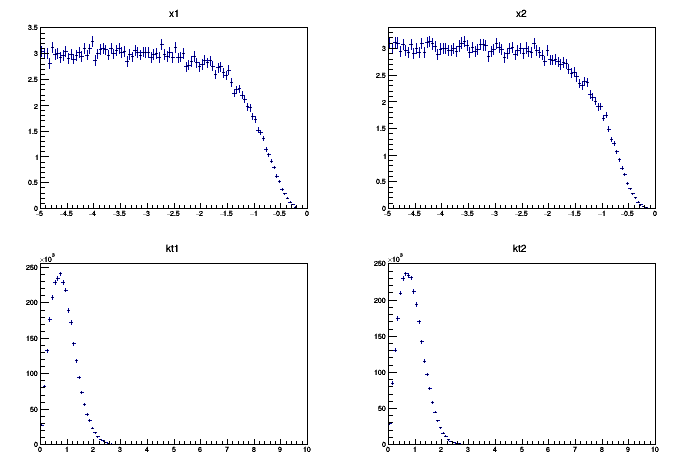

In [9]:
gStyle.SetOptStat(0) # get rid of statistics box
c = TCanvas()
# divide the canvas in 1 parts in x and 1 in y
c.Divide(2,2)
c.cd(1)
histo1.Scale(1./npoints, "width")
histo1.Draw()
c.cd(2)
histo2.Scale(1./npoints, "width")
histo2.Draw()
c.cd(3)
histo3.Draw()
c.cd(4)
histo4.Draw()
c.Draw()

Draw the pT, eta and mass of the Higgs boson

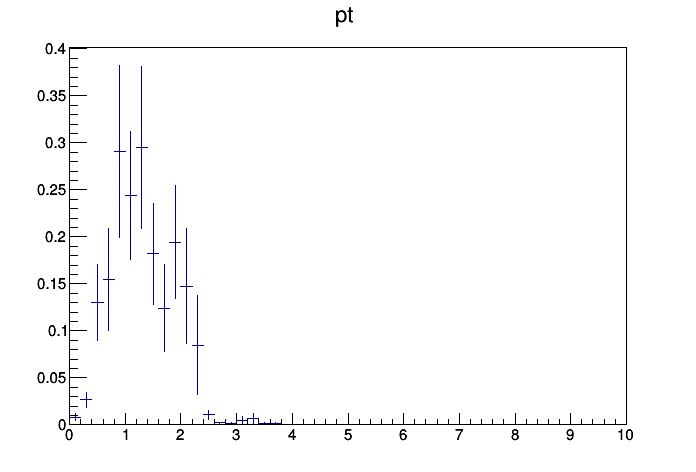

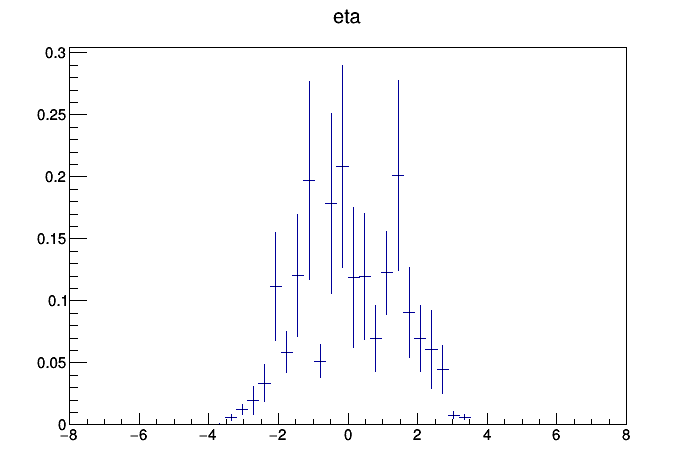

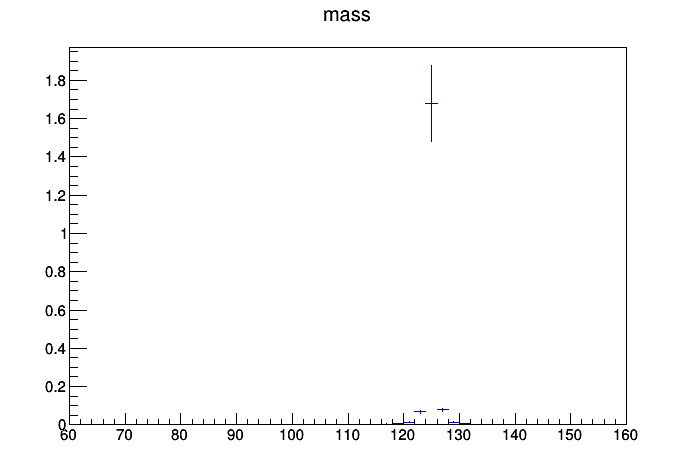

In [10]:
c5 = TCanvas()
histo5.Draw()
c5.Draw()
c6 = TCanvas()
histo6.Draw()
c6.Draw()
c7 = TCanvas()
histo7.Draw()
c7.Draw()